# Load and Explore CIFAR-10

In [2]:
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

# Load CIFAR-10 data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Print shapes
print("x_train shape:", x_train.shape)   # (50000, 32, 32, 3)
print("y_train shape:", y_train.shape)   # (50000, 1)
print("x_test shape:", x_test.shape)     # (10000, 32, 32, 3)

# CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 192s 1us/step
x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)


## Visualize sample images

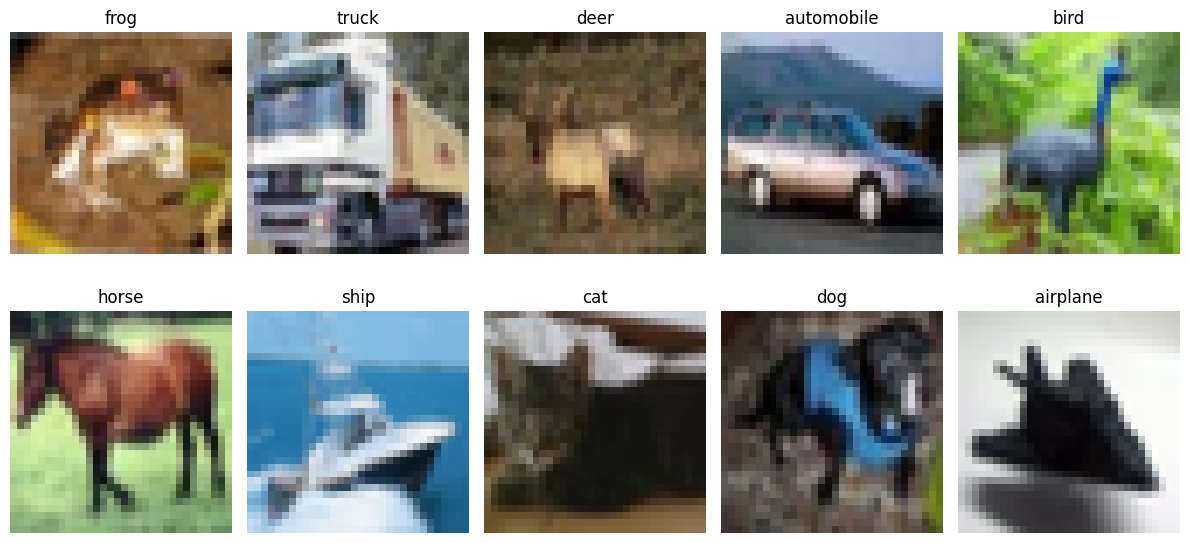

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

# Load data again (if not already)
(x_train, y_train), (_, _) = cifar10.load_data()

# Class label names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Plot 1 image per class
plt.figure(figsize=(12, 6))
shown_classes = set()
i = 0
while len(shown_classes) < 10:
    label = y_train[i][0]
    if label not in shown_classes:
        plt.subplot(2, 5, len(shown_classes) + 1)
        plt.imshow(x_train[i])
        plt.title(class_names[label])
        plt.axis('off')
        shown_classes.add(label)
    i += 1

plt.tight_layout()
plt.show()


## Normalize and Prepare

In [5]:
from sklearn.model_selection import train_test_split

# Normalize pixel values from [0, 255] to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Split training set: 10% for validation
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.1, random_state=42
)

# Check shapes
print("Training set:", x_train.shape)
print("Validation set:", x_val.shape)
print("Test set:", x_test.shape)


Training set: (45000, 32, 32, 3)
Validation set: (5000, 32, 32, 3)
Test set: (10000, 32, 32, 3)


## Build CNN Model

In [10]:
import tensorflow as tf
from tensorflow.keras import models, layers

model = models.Sequential([
    tf.keras.Input(shape=(32, 32, 3)),  
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 30, 30, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 13, 13, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 4, 4, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 161,098 (629.29 KB)

 Trainable params: 160,650 (627.54 KB)

 Non-trainable params: 448 (1.75 KB)

## Compile the Model

In [11]:
model.compile(
    optimizer='adam',                    # Adam optimizer is efficient and adaptive
    loss='sparse_categorical_crossentropy',  # Use this for integer labels (0–9)
    metrics=['accuracy']                 # Track accuracy during training
)

## Train the Model

In [12]:
history = model.fit(
    x_train, y_train,
    epochs=10,                  # Number of times the model sees the full dataset
    validation_split=0.1,      # 10% data will be used for validation
    batch_size=64,             # Number of samples per gradient update
    verbose=1                  # Show training progress
)

Epoch 1/10
633/633 ━━━━━━━━━━━━━━━━━━━━ 24s 35ms/step - accuracy: 0.3715 - loss: 1.8334 - val_accuracy: 0.5238 - val_loss: 1.3446
Epoch 2/10
633/633 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.5587 - loss: 1.2388 - val_accuracy: 0.5613 - val_loss: 1.2268
Epoch 3/10
633/633 ━━━━━━━━━━━━━━━━━━━━ 24s 37ms/step - accuracy: 0.6199 - loss: 1.0762 - val_accuracy: 0.5882 - val_loss: 1.1528
Epoch 4/10
633/633 ━━━━━━━━━━━━━━━━━━━━ 24s 39ms/step - accuracy: 0.6648 - loss: 0.9447 - val_accuracy: 0.5520 - val_loss: 1.4179
Epoch 5/10
633/633 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.7010 - loss: 0.8437 - val_accuracy: 0.6793 - val_loss: 0.9287
Epoch 6/10
633/633 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.7158 - loss: 0.8013 - val_accuracy: 0.6616 - val_loss: 0.9860
Epoch 7/10
633/633 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.7382 - loss: 0.7341 - val_accuracy: 0.7196 - val_loss: 0.8202
Epoch 8/10
633/633 ━━━━━━━━━━━━━━━━━━━━ 22s 34ms/step - accuracy: 0.7582 - loss: 0.6852 - 

## Plot Training & Validation Accuracy and Loss

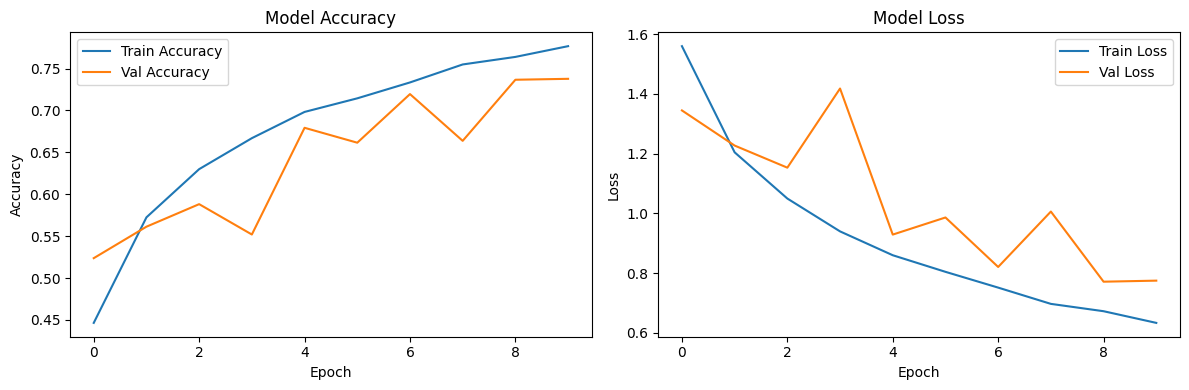

In [14]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


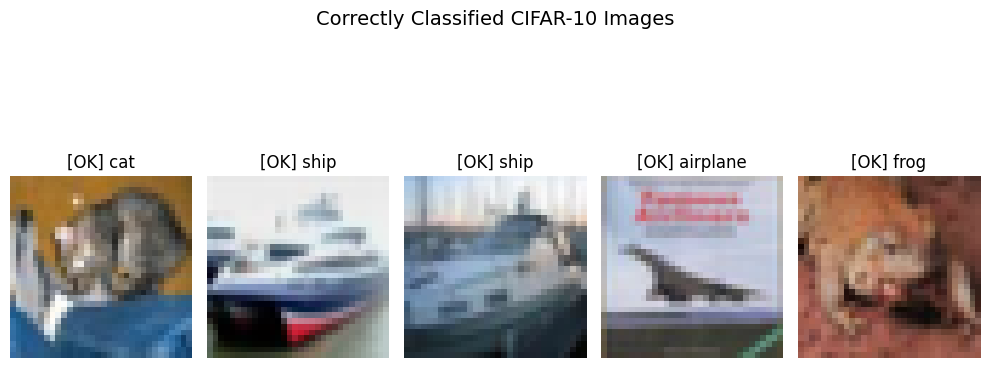

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Predict labels
y_pred = np.argmax(model.predict(x_test), axis=1)

# Find correctly classified indices
correct_idx = np.where(y_pred == y_test.flatten())[0]

# Class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Plot 5 correctly classified images
plt.figure(figsize=(10, 5))
for i, idx in enumerate(correct_idx[:5]):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_test[idx])
    plt.title(f"[OK] {class_names[y_pred[idx]]}")
    plt.axis('off')

plt.suptitle("Correctly Classified CIFAR-10 Images", fontsize=14)
plt.tight_layout()
plt.show()


## Mis-classified inage

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


C:\Users\Admin\AppData\Local\Temp\ipykernel_17832\1049575037.py:21: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\SwabhavDrive\Deep Learning\ai-env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


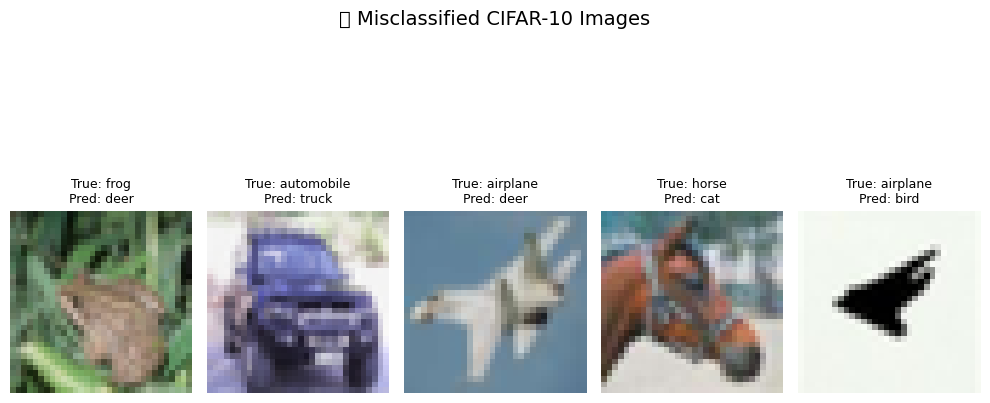

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Get predicted class indices from the softmax output
y_pred = np.argmax(model.predict(x_test), axis=1)

# Find misclassified indices
misclassified_idx = np.where(y_pred != y_test.flatten())[0]

# Plot a few misclassified examples
plt.figure(figsize=(10, 5))
for i, idx in enumerate(misclassified_idx[:5]):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_test[idx])
    true_label = class_names[y_test[idx][0]] if y_test.ndim > 1 else class_names[y_test[idx]]
    pred_label = class_names[y_pred[idx]]
    plt.title(f"True: {true_label}\nPred: {pred_label}", fontsize=9)
    plt.axis('off')

plt.suptitle("❌ Misclassified CIFAR-10 Images", y=1.05, fontsize=14)
plt.tight_layout()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
🔍 Classification Report:

              precision    recall  f1-score   support

    airplane       0.78      0.75      0.76      1000
  automobile       0.93      0.79      0.85      1000
        bird       0.65      0.62      0.64      1000
         cat       0.57      0.55      0.56      1000
        deer       0.63      0.80      0.70      1000
         dog       0.68      0.61      0.64      1000
        frog       0.85      0.78      0.81      1000
       horse       0.82      0.72      0.76      1000
        ship       0.80      0.87      0.83      1000
       truck       0.72      0.90      0.80      1000

    accuracy                           0.74     10000
   macro avg       0.74      0.74      0.74     10000
weighted avg       0.74      0.74      0.74     10000



<Figure size 1000x800 with 0 Axes>

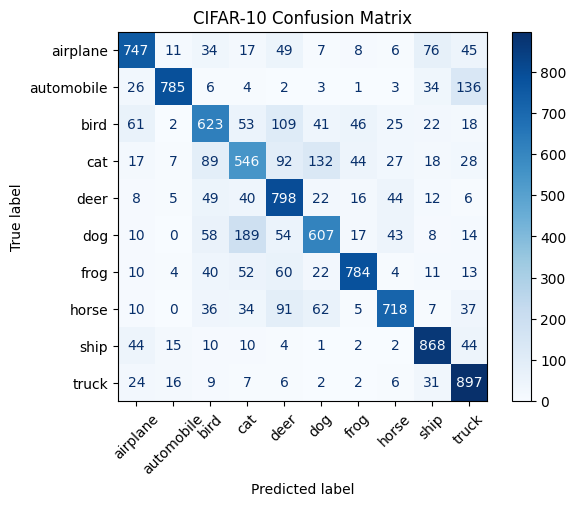

In [20]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Predict class labels
y_pred = np.argmax(model.predict(x_test), axis=1)
y_true = y_test.flatten()  # Ensure it's a flat array

# 1. Classification Report
print("🔍 Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))

# 2. Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Plot Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
plt.figure(figsize=(10, 8))
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("CIFAR-10 Confusion Matrix")
plt.show()
